# Identifikasi Masalah

Suatu perusahaan retail online menyewa jasa saya untuk menganalisa data penjualan selama 1 tahun terakhir (plus 1 bulan Desember di tahun sebelumnya). Tujuannya adalah, mereka menginginkan saya untuk memberikan insight yang dipakai untuk membuat strategi bisnis pada tahun depan. Mereka membutuhkan informasi mengenai sumber terbesar revenue, matriks - matriks yang diperlukan, dan insight - insight lain yang dapat membantu mereka dalam membuat keputusan strategi bisnis

Penjabaran masalah dengan 5W + 1H :
1. Faktor apa yang menjadi sumber terbesar revenue ? (inferensial)  -
2. Dalam kurun waktu 2 tahun, kapan revenue terbesar didapatkan ? (visual)  V
3. Dimana tempat penyumbang revenue terbesar ? (visual) V
4. Customer seperti apa yang menyumbang revenue terbesar ? (visual) -
5. Kenapa total revenue dari setiap negara berbeda - beda ? (visual) V
6. Bagaimana perilaku customer dari setiap negara ? (korelasi) -


SMART FRAMEWORK
1. Specific

   Memberikan insight yang dapat dijadikan landasan untuk meningkatkan revenue perusahaan di tahun depan berdasarkan 5 negara penyumbang revenue terbesar

2. Measurable

   Memberikan insight yang dapat meningkatkan revenue perusahaan sebanyak 10 % dibandingkan tahun ini

3. Achievable

   Menganalisa business metrics yang sesuai dengan faktor terbesar penyumbang revenue 

4. Relevant

   Business metrics yang sesuai dengan faktor penyumbang revenue terbesar dapat dijadikan landasan dalam pengambilan keputusan strategi bisnis untuk meningkatkan revenue 

5. Time bond

   Dalam jangka waktu 1 bulan insight sudah harus tersedia untuk didiskusikan dengan stakeholders

Problem statement :

Memberikan insight yang dapat meningkatkan revenue perusahaan sebanyak 10% berdasarkan faktor terbesar penyumbang revenue serta business metrics nya dari 5 negara



# 1. Data Loading

### 1.1. Import Library

In [247]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pd.options.display.float_format = '{:,.2f}'.format

### 1.2. Menampilkan DataFrame

In [248]:
# Upload data
df = pd.read_csv('tata_consultant.csv',index_col=0)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,"17,850.00",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,"17,850.00",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,"12,680.00",France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,"12,680.00",France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,"12,680.00",France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,"12,680.00",France


Dari data diatas maka dapat disimpulkan :

1. Terdapat lebih dari 1 invoice number yang sama pada tanggal dan jam yang sama. Hal ini mengindikasikan bahwa 1 invoice dapat mengandung informasi lebih dari 1 data pembelian. Harus berhati - hati dalam menghitung penjualan/sales per transaksi (harus di groupby terlebih dahulu)

2. Terdapat karakter yang harus dihapus di kolom CustomerID yaitu karakter '.' dan ','. Jika dibiarkan hal tersebut dapt mengacaukan pembacaan (kemungkinan akan dikira uang)

### 1.3. Menampilkan info dataframe

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


Dari data di atas kita dapat menarik beberapa informasi :

1. Dari 541909 baris, terdapat nilai null yang cukup banyak pada kolom CustomerID. Arti dari nilai null tersebut harus diselidiki lebih lanjut ini harus diselidiki lebih lanjut 

2. Kolom CustomerID harus diubah datanya menjadi tipe string atau integer karena karakter koma sangat tidak cocok untuk dipakai pada suatu ID

### 1.4. Menampilkan nilai jumlah nilai unique StockCode

In [250]:
df['StockCode'].value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64

StockCode pada data di atas tidak akan diubah menjadi bentuk numerik karena ada beberapa stockcode yang menggunakan karakter string

### 1.5. Menampilkan jumlah nilai unique CustomerID

In [251]:
df['CustomerID'].value_counts()

CustomerID
17,841.00    7983
14,911.00    5903
14,096.00    5128
12,748.00    4642
14,606.00    2782
             ... 
15,070.00       1
15,753.00       1
17,065.00       1
16,881.00       1
16,995.00       1
Name: count, Length: 4372, dtype: int64

### 1.6. Menampilkan jumlah nilai unique Quantity

In [252]:
df['Quantity'].value_counts()

Quantity
 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: count, Length: 722, dtype: int64

In [253]:
df.loc[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,"14,527.00",United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,"15,311.00",United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,"17,548.00",United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,"17,548.00",United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,"17,548.00",United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,"14,397.00",United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,"15,498.00",United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,"15,311.00",United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,"17,315.00",United Kingdom


Terdapat beberapa data yang nilainya dibawah 0 atau minus. Biasanya pada dunia retail, nilai minus menandakan barang yang dikembalikan atau barang yang dicancle dari pembelian. Baris - baris dengan nilai minus tersebut harus dihapus karena dapat mengacaukan perhitungan revenue

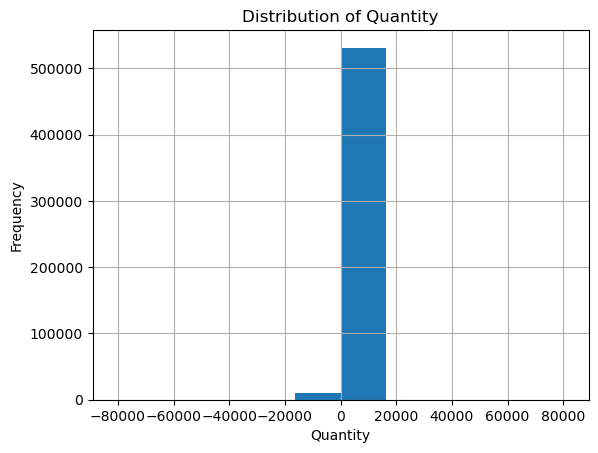

In [254]:
df['Quantity'].hist(bins=10)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

Gambar di atas adalah visualisasi perbandingan antara quantity >= 0 dan quantity < 0

### 1.7. Menampilkan nilai unique Country 

In [255]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


Terdapat lebih dari 38 Coutnry pada dataset ini. Dari data di atas dapat dilihat jika sebagian besar transaksi berasal dari United Kingdom dan diikuti oleh negara - negara eropa lain. Hal ini mengindikasikan bahwa pasar terbesar perusahaan retail ini berasal ari eropa dan ada kemungkinan besar juga bahwa perusahaan ini menjalankan oeprasinya di eropa (terutama UK)

In [256]:
df['Country'].nunique()

38

# 3. Data Cleaning

### 3.1. Data duplikat

Data duplikat adalah baris yang seluruh nilainya memiliki kesamaan dengan baris lain. Data ini selain tidak mengandung informasi berharga (karena sudah diwakilkan) wajib dihapus karena dapat mengacaukan perhitungan statistik

In [257]:
# Cek jumlah data
print(f'Jumlah data = {len(df)}')

# Cek jumlah data duplikat
print(f'Jumlah data duplikat = {df.duplicated().sum()}')

Jumlah data = 541909
Jumlah data duplikat = 5268


In [258]:
# Menghitung presentase data duplikat
print(f"Presentase data duplikat = {((df.duplicated().sum())/(len(df)))*100} %")

Presentase data duplikat = 0.9721189350979592 %


Presentase data duplikat cukup kecil yaitu sebesar 0.972 % dari total 541909 baris data

In [259]:
# Cek data duplikat dalam bentuk dataframe
df[df.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,"17,908.00",United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,"17,908.00",United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,"17,908.00",United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,"17,908.00",United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,"17,920.00",United Kingdom


In [260]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True, ignore_index=True)

In [261]:
# Cek hasil
print(f'Data duplikat = {df.duplicated().sum()}')

Data duplikat = 0


### 3.2. Mengatasi missing values

Missing values merepresentasikan ketiadaan nilai dari suatu data. Missing values harus dihandling agar dapat memiliki arti dan dapat digunakan untuk melakukan perhitungan matematis. Handling dapat dilakukan dengan cara penghapusan atau pengisian data missing values dengan nilai lain yang relevan. Terdapat 2 jenis missing values yaitu standard missing values dan non standard missing values. Standard missing values (None, NaN, dll) dapat ditemukan dengan mudah karena secara umum python dapat mengenalinya. Untuk non standard missing values, kita harus menentukan dan memperkirakan terlebih dahulu seperti apa kategori nilai yang dapat memiliki arti missing values.

Pada tahap ini, missing values akan dihapus jika sifatnya dapat mengacaukan analisis statistik dan akan diisi dengan nilai lain yang relevan jika sifatnya tidak dapat mengacaukan analisis statistik.

#### 3.2.1. Standard missing values

In [262]:
# Cek standard missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

Dari info di atas dapat disimpulkan bahwa terdapat missing values dengan jumlah yang sangat besar pada kolom CustomerID dan missing values yang jumlahnya kecil pada kolom Description (deskripsi produk)

In [263]:
# Cek dataframe dengan nilai null pada kolom CustomerID
df.loc[df['CustomerID'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
605,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1407,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1408,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1409,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1410,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


Baris yang memiliki nilai missing values pada kolom CustomerID akan diisi dengan nilai 0 (karena tipe datanya numerik). Baris - baris tersebut tidak akan kita hapus karena nilainya memang tidak diperlukan untuk melakukan perhitungan statistik

In [264]:
# Mengganti id customer yang null dengan nilai 0
df['CustomerID'].fillna(0,inplace=True)

# Cek hasil
df['CustomerID'].isna().sum()

0

In [265]:
# Cek dataframe dengan nilai null pada kolom Description
df.loc[df['Description'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
605,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,0.00,United Kingdom
1934,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,0.00,United Kingdom
1935,536546,22145,NaN,1,2010-12-01 14:33:00,0.00,0.00,United Kingdom
1936,536547,37509,NaN,1,2010-12-01 14:33:00,0.00,0.00,United Kingdom
1951,536549,85226A,NaN,1,2010-12-01 14:34:00,0.00,0.00,United Kingdom


Pada kolom deskripsi terdapat missing values yang jumlahya tergolong kecil jika dibandingkan populasi data. Namun, kita harus mengecek apakah baris - baris yang memiliki missing values pada kolom deskripsi dapat menyebabkan kerancuan pada perhitungan sales

In [266]:
# Cek nilai sales pada kondisi Description == Null
salesAtNull = df.loc[df['Description'].isnull()]['UnitPrice'].sum()
salesAtNull.sum()

0.0

Dari hasil di atas kita dapat menyimpulkan bahwa baris - baris yang memiliki nilai missing values pada bagian Description, tidak akan mempengaruhi perhitungan nilai sales. Artinya kita dapat mengisi nilai missing values tersebut dengan nilai lain yang relevan. Kita akan mengganti nilai missing values pada kolom description dengan nilai 'No data'

In [267]:
# Menghapus baris dengan nilai null pada kolom Description
df['Description'].fillna('No data',inplace=True)

# Cek hasil
df['Description'].isna().sum()


0

#### 3.2.2. Non standard missing values

Pada tahap ini kita akan melakukan pengecekan non standard missing values. Untuk mengecek non standard missing values, kita memerlukan beberapa karakter atau nilai asumsi yang mungkin akan muncul pada suatu baris dari suatu kolom. Beberapa kemungkinan nilai non standard missing values yang akan muncul adalah 'N/A', 'NA','None', 'none','unknown', 'Unknown', '-', '.', '0', dan False. Karakter - karakter atau nilai tersebut nantinya akan dimasukan ke dalam default parameter na_values menggunakan fungsi read_csv(). Jika ditemukan non standard missing values, maka kita dapat melakukan handling terhadap nilai tersebut di dataframe utama (df)

In [268]:
# Mencari non standard missing values
dsmv = pd.read_csv('tata_consultant.csv', na_values=['N/A', 'NA','None', 'none','unknown','Unknown','-','.','0', False ], index_col=0)
dsmv.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice        2515
CustomerID     135080
Country             0
dtype: int64

Dari hasil di atas dapat disimpulkan jika ada terdapat 2515 baris yang mengandung non standard missing values pada kolom UnitPrice. Abaikan missing values pada kolom CustomerID dan Description karena sudah dilakukan handling pada bagian standard missing values (df sebagai dataframe utama)

In [269]:
# Cek table
df.loc[df['UnitPrice'].isin(['N/A', 'NA','None', 'none','unknown','Unknown','-','.','0', False])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
605,536414,22139,No data,56,2010-12-01 11:52:00,0.00,0.00,United Kingdom
1934,536545,21134,No data,1,2010-12-01 14:32:00,0.00,0.00,United Kingdom
1935,536546,22145,No data,1,2010-12-01 14:33:00,0.00,0.00,United Kingdom
1936,536547,37509,No data,1,2010-12-01 14:33:00,0.00,0.00,United Kingdom
1951,536549,85226A,No data,1,2010-12-01 14:34:00,0.00,0.00,United Kingdom
...,...,...,...,...,...,...,...,...
531753,581234,72817,No data,27,2011-12-08 10:33:00,0.00,0.00,United Kingdom
533259,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.00,0.00,United Kingdom
533260,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.00,0.00,United Kingdom
533309,581408,85175,No data,20,2011-12-08 14:06:00,0.00,0.00,United Kingdom


Dari data di atas terdapat pola dimana nilai Description kemungkinan akan bernilai 'No data' dan nilai CustomerID kemungkinan akan bernilai 0 ketika nilai UnitPrice sama dengan 0. Selain itu, terdapat hal aneh dimana nilai Quantity tidak bernilai 0 ketika UnitPrice bernilai 0. Hal ini kemungkinan besar terjadi karena kesalahan dalam penginputan data atau data UnitPrice memang benar - benar hilang setelah diinput.

Baris dengan nilai UnitPrice = 0  harus dihapus karena tidak dapat dipakai untuk perhitungan revenue dan sales

In [270]:
# Hapus baris dengan nilai UnitPrice = 0
df.drop(df.loc[df['UnitPrice'].isin(['N/A', 'NA','None', 'none','unknown','Unknown','-','.','0', False])].index,inplace = True)

# Cek hasil
len(df.loc[df['UnitPrice'].isin(['N/A', 'NA','None', 'none','unknown','Unknown','-','.','0', False])])

0

### 3.3 Mengubah tipe data kolom

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534131 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    534131 non-null  object 
 1   StockCode    534131 non-null  object 
 2   Description  534131 non-null  object 
 3   Quantity     534131 non-null  int64  
 4   InvoiceDate  534131 non-null  object 
 5   UnitPrice    534131 non-null  float64
 6   CustomerID   534131 non-null  float64
 7   Country      534131 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.7+ MB


Dari informasi di atas, kolom yang harus kita ubah bentuuk datanya adalah CustomerID dan InvoiceDate. CustomerID akan diubah bentuk datanya menjadi Int, sementara InvoiceDate akan diubah bentuk datanya menjadi Date. Sebagai catatan, kolom InvoiceNo tidak bisa diubah tipe datanya menjadi integer karena kolom tersebut terindikasi memiliki angka - angka yang berpasangan dengan huruf

In [272]:
# Mengubah tipe data InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Mengubah tipe data CustomerID
df['CustomerID'] = df['CustomerID'].astype(int)


In [273]:
# # Cek hasil
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534131 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    534131 non-null  object        
 1   StockCode    534131 non-null  object        
 2   Description  534131 non-null  object        
 3   Quantity     534131 non-null  int64         
 4   InvoiceDate  534131 non-null  datetime64[ns]
 5   UnitPrice    534131 non-null  float64       
 6   CustomerID   534131 non-null  int32         
 7   Country      534131 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 34.6+ MB


Dari 534131 baris data, tidak ditemukan lagi adanya missing values

In [274]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### 3.4. Menghapus karakter spasi pada bagian depan dan belakang nilai string

Pada tahap ini kita akan menggunakan fungsi strip() untuk menghapus karakter spasi yang biasanya sering di temui pada bagian depan dan belakang nilai string. Karena nama kolom tidak terindikasi memiliki karakter spasi tersebut, maka pembersihan hanya dilakukan pada nilai - nilai dari tiap kolom yang bertipe data string/object.

In [275]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2353
REGENCY CAKESTAND 3 TIER              2187
JUMBO BAG RED RETROSPOT               2153
PARTY BUNTING                         1719
LUNCH BAG RED RETROSPOT               1625
                                      ... 
BLACK GLASS/SHELL/PEARL NECKLACE         1
SWEETHEART KEY CABINET                   1
WALL ART , THE MAGIC FOREST              1
ORANGE FELT VASE + FLOWERS               1
ASSORTED COLOUR SILK GLASSES CASE        1
Name: count, Length: 4042, dtype: int64

Dari data di atas terlihat adanya karakter spasi pada beberapa nilai di kolom description

In [276]:
# Menghapus karakter spasi pada tiap nilai yang bertipe string
for col in df.loc[:,['StockCode', 'Description', 'Country']] :
    df[col] = df[col].str.strip()

# Cek hasil 
df['Description']


0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
536636            PACK OF 20 SPACEBOY NAPKINS
536637            CHILDREN'S APRON DOLLY GIRL
536638           CHILDRENS CUTLERY DOLLY GIRL
536639        CHILDRENS CUTLERY CIRCUS PARADE
536640           BAKING SET 9 PIECE RETROSPOT
Name: Description, Length: 534131, dtype: object

### 3.5. Menghapus baris yang memiliki nilai numerik minus 

Pada bagian bab data loading, kita dapat melihat beberapa nilai minus pada kolom Quantity. Nilai minus pada Quantity belum bisa didefinisikan secara pasti, namun kemungkinan besar nilai minus tersebut berkaitan dengan pengembalian barang, pembatalan transaksi, atau penyesuaian inventaris. Apapun itu, kita tidak boleh memasukan angka minus pada data penjualan karena akan mempengaruhi perhitungan revenue. Maka dari itu ditetapkan bahwa pada kolom - kolom bertipe numerik, nilai harus berada di dua kemungkinan, lebih besar dari 0 atau sama dengan 0 (n >= 0)

In [277]:
# Cek jumlah baris yang nilai Quantitynya minus
quanminus = df.loc[df['Quantity'] < 0]['Quantity'].count()

# Cek jumlah baris yang nilai UnitPricenya minus
upminus = df.loc[df['UnitPrice'] < 0]['UnitPrice'].count()

print(f'Jumlah baris dengan nilai quantity minus = {quanminus}')
print(f'Jumlah baris dengan nilai unit price minus = {upminus}')

Jumlah baris dengan nilai quantity minus = 9251
Jumlah baris dengan nilai unit price minus = 2


In [278]:
# Hapus baris dengan nilai quantity minus
df.drop(df.loc[df['Quantity'] < 0].index,inplace=True)

# Hapus baris dengan nilai unit price minus
df.drop(df.loc[df['UnitPrice'] < 0].index,inplace=True)

# Cek hasil
df.loc[df['Quantity'] < 0]['Quantity'].sum()

0

### 3.6. Membuat kolom Year, Month, dan Sales

Kolom baru seperti Year, Month, dan Sales diperlukan untuk kebutuhan analisis statistik dan visualisasi data. Kolom Year dan Month akan diambil berdasarkan waktu invoice atau pembelian dibuat, sementara kolom Sales dibuat berdasarkan hasil kali antara unit price dengan quantity

In [279]:
# Membuat kolom baru dengan format YYYY-MM
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Membuat kolom Sales
df['Sales($)'] = df['Quantity']*df['UnitPrice']

# Cek hasil
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,Sales($)
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34


### 3.7. Perbaikan penamaan karakter string pada kolom Description

Tahap ini bertujuan agar nama - nama produk terlihat lebih rapih dan mudah dipahami. Namun perlu dicatat bahwa nama produk sangat berantakan dalam hal penempatan tanda khusus ('. -. dll). Saya tidak akan menghapus karakter - karakter khusu tersebut karena ditakutkan akan merubah makna dari nama produk

In [280]:
# Mengubah format penamaan produk menjadi capitalize
df['Description'] = df['Description'].str.capitalize()

# Cek hasil 
df['Description']
df.to_csv('dataclean.csv')

# 4. Analisis

Bab ini akan berisi 4 bagian. Proses ini dimulai dari bagian general lalu setiap pindah ke subbab berikutnya, pembahasan akan semakin mengerucut hingga berakhir pada suatu proses uji hipotesis. Sebelum masuk ke analisis, ada 1 hal yang harus ditangani yaitu oulier dari kolom UnitPrice yang terlalu ekstrim (sumber data juga merekomendasikan untuk mengecek hal ini), namun produknya sulit dipahami atau dimengerti.

Di bawah ini adalah beberapa 2 produk dengan harga unit price termahal

In [281]:
df.loc[df['Description'].isin(['Manual', 'Dotcom postage'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,Sales($)
1778,536544,DOT,Dotcom postage,1,2010-12-01 14:32:00,569.77,0,United Kingdom,2010-12,569.77
2195,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,2010-12,1.25
2206,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,2010-12,18.95
2997,536592,DOT,Dotcom postage,1,2010-12-01 17:06:00,607.49,0,United Kingdom,2010-12,607.49
5365,536862,DOT,Dotcom postage,1,2010-12-03 11:13:00,254.43,0,United Kingdom,2010-12,254.43
...,...,...,...,...,...,...,...,...,...,...
532022,581238,DOT,Dotcom postage,1,2011-12-08 10:53:00,"1,683.75",0,United Kingdom,2011-12,"1,683.75"
533079,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521,United Kingdom,2011-12,1.26
534111,581439,DOT,Dotcom postage,1,2011-12-08 16:30:00,938.59,0,United Kingdom,2011-12,938.59
535647,581492,DOT,Dotcom postage,1,2011-12-09 10:03:00,933.17,0,United Kingdom,2011-12,933.17


2 produk harus dihapus karena nilai kumulatif salesnya terlalu ekstrim pada quantity terjual yang rendah

In [282]:
df = df.loc[~df['Description'].isin(['Manual','Dotcom postage'])]


### 4.1 Mencari waktu dengan revenue tertinggi

Sub bab ini akan menganalisa tempat atau negara yang menghasilkan revenue tertinggi. Setelah didapatkan 5 negara yang menghasilkan revenue tertinggi, maka nantinya kita akan menganilsa perilaku customer di 5 negara tersebut.

In [283]:
# Membuat table baru sales per bulan
sales_month = df.groupby('YearMonth')['Sales($)'].sum().reset_index()
sales_month = sales_month.sort_values(by='YearMonth').reset_index(drop=True)
sales_month.to_csv('Biggest revenue.csv',index=False)
sales_month


,YearMonth,Sales($)
0,2010-12,"794,301.28"
1,2011-01,"675,792.89"
2,2011-02,"511,247.54"
3,2011-03,"696,149.17"
4,2011-04,"519,324.61"
5,2011-05,"753,846.08"
6,2011-06,"743,770.47"
7,2011-07,"694,127.32"
8,2011-08,"741,128.82"
9,2011-09,"1,035,172.60"


In [284]:
(sales_month['Sales($)'].sum()) - 794301

9563808.213999998

In [285]:
# Membuat line chart sales per bulan
fig = px.line(sales_month,
              x = sales_month['YearMonth'].dt.strftime('%b %Y'),
              y = 'Sales($)',
              title = 'Monthly Sales')
fig.update_xaxes(tickangle = 90)
fig.update_layout(xaxis_title = 'Month-Year ($)', title_x = 0.5)
fig.show()

Dari grafik di atas maka dapat disimpulkan :
1. Secara global, terjadi kenaikan sales kumulatif yang dimulai pada bulan Agustus hingga November. Setelah itu terjadi penurunan yang cukup ekstrim

2. Dari bulan Desember 2010 sampai bulan Juli 2011, sales memiliki pola yang naik turun

3. Sales cenderung naik pada akhir musim panas dan akhir musim gugur

4. Puncak dari sales kumulatif berada pada bulan November. Namun perlu dicatat bahwa grafik di atas belum bisa menggambarkan sepenuhnua perubahan/pertumbuhan sales per bulan


Selain berkaitan dengan hal kumulatif, kita juga membahas mengenai perubahan atau pertumbuhan sales. Pertumbuhan sales sangat penting untuk diketahui karena menjadi salah satu yang dapat mencerminkan performa dari suatu perusahaan

In [286]:
# Membuat selisih revenue per bulan
sales_month['ChangeRevenue'] = round(sales_month['Sales($)'].diff(),2)
        
# Membuat table persen selisih revenue per bulan
sales_month['%RevenueGrowth'] = round(sales_month['Sales($)'].pct_change()*100,2)

# Mengisi null value dengan 0
sales_month.fillna(0,inplace=True)

# Cek hasil
sales_month



,YearMonth,Sales($),ChangeRevenue,%RevenueGrowth
0,2010-12,"794,301.28",0.00,0.00
1,2011-01,"675,792.89","-118,508.39",-14.92
2,2011-02,"511,247.54","-164,545.35",-24.35
3,2011-03,"696,149.17","184,901.63",36.17
4,2011-04,"519,324.61","-176,824.56",-25.40
5,2011-05,"753,846.08","234,521.47",45.16
6,2011-06,"743,770.47","-10,075.61",-1.34
7,2011-07,"694,127.32","-49,643.15",-6.67
8,2011-08,"741,128.82","47,001.50",6.77
9,2011-09,"1,035,172.60","294,043.78",39.68


In [287]:
# Membuat grafik % pertumbuhan revenue
fig = px.bar(sales_month, x=sales_month['YearMonth'].dt.strftime('%b %Y'), y=sales_month['%RevenueGrowth'],
             title = '% Growth Revenue per Month',
             color=sales_month['%RevenueGrowth'],
             color_continuous_scale = 'Magenta')
fig.update_layout(title_x = 0.5)
fig.show()

Grafik di atas menggambanrkan pertumbuhan revenue/sales dari bulan Desember 2010 hingga bulan Desember 2011. Pola grafik ini berbeda dengan pola grafik sales kumulatif per bulan karena grafik ini dibuat berdasarkan presentase pertumbuhan sales pada bulan ke n dibandingkan dengan bulan ke n-1 ((bulan n - bulan n-1)/bulan n-1)x100. Dari gambar di atas kita dapat mengambil informasi :

1. Peningkatan revenue tertinggi terjadi pada bulan Mei (46.16 %), diikuti dengan bulan September, Maret, Agustus, dan Oktober

2. Terjadi kenaikan % pertumbuhan sales terus menerus sepanjang bulan Agustus 2011 hingga bulan November 2011. Ini menegaskan kembali bahwa pada akhir musim panas hingga akhir musim gugur memang terjadi peningkatan sales. Penyebabnya belum dapat diketahui secara pasti, tetapi berdasarkan informasi berita, pada tahun 2011 pada akhir musim panas uni eropa mengeluarkan kebijakan pinjaman kepada negara - negara yang mengalami gagal bayar (Europe Debt Crisis). Mungkin saja hal ini menjadi alasan mengapa pada awal tahun terjadi penurunan sales dan terjadi pertumbuhan di akhir musim panas

3. Penurunan % pertumbuhan sales terbesar terjadi pada bulan Desember 2011 (-57.81 % dibandingkan bulan sebelumnya).

In [288]:
avgChangeRevenue = sales_month['%RevenueGrowth'].mean()

print(f'Persen rata - rata pertumbuhan revenue per bulan = {round(avgChangeRevenue,2)} %')

Persen rata - rata pertumbuhan revenue per bulan = 2.79 %


In [289]:
print(f'Estimasi pertumbuhan revenue dalam setahun pada tahun depan = {avgChangeRevenue*12} %')

Estimasi pertumbuhan revenue dalam setahun pada tahun depan = 33.5353846153846 %


Perhitungan di atas adalah perhitungan rata - rata persentase pertumbuhan sales dalam sebulan. Dari perhitungan tersebut didapatkan angka 2.79 %. Jika perusahaan bisa menjaga performanya seperti saat ini, maka total kenaikan revenue tahun depan berdasarkan perhitungan dasar adalah sebesar 33.53 %.

### 4.2 Mencari negara - negara penyumbang revenue terbesar

In [290]:
# Membuat table baru total revenue dari tiap tiap negara
rev_country = df.groupby('Country')['Sales($)'].sum().reset_index()
rev_country = rev_country.sort_values(by='Sales($)',ascending=False).reset_index(drop=True)
rev_country.rename(columns={'Sales($)' : 'Total Revenue ($)'}, inplace=True)
rev_country['Percentage Revenue'] = round((rev_country['Total Revenue ($)']/rev_country['Total Revenue ($)'].sum())*100,2)
rev_country.to_csv('revenuebycountry.csv',index=False)
rev_country.head(10)

,Country,Total Revenue ($),Percentage Revenue
0,United Kingdom,"8,760,562.62",84.58
1,Netherlands,"285,446.34",2.76
2,EIRE,"276,090.86",2.67
3,Germany,"226,382.15",2.19
4,France,"200,133.00",1.93
5,Australia,"138,453.81",1.34
6,Spain,"61,558.56",0.59
7,Switzerland,"57,067.60",0.55
8,Belgium,"41,196.34",0.40
9,Sweden,"38,337.83",0.37


Table di atas menunjukan 10 negara penghasil sales kumulatif terbesar. Dari table tersebut  terlihat bahwa penyumbang revenue terbesar adalah negara United Kingdom (84.58 %) diikuti dengan Netherlands, EIRE (nama lain dari irlandia), Germany, dan France. Hal ini mengindikasikan bahwa perusahaan ini beroperasi di Inggris (United Kingdom) dan mayoritas pembelinya berasal dari negara tersebut.

In [291]:
# Membuat grafik total kumulatif revenue per negara
fig = px.bar(rev_country, x=rev_country.loc[rev_country['Country'] != 'United Kingdom']['Country'], y=rev_country.loc[rev_country['Country'] != 'United Kingdom']['Total Revenue ($)'],
             title = 'Total Revenue by Country',
             color = rev_country.loc[rev_country['Country'] != 'United Kingdom']['Total Revenue ($)'],
             color_continuous_scale = 'Magenta')
fig.update_layout(title_x = 0.5)

In [292]:
# Membuat grafik total kumulatif revenue per negara
fig = px.bar(rev_country, x=rev_country['Country'], y=rev_country['Total Revenue ($)'],
             title = 'Total Revenue by Country',
             color = rev_country['Total Revenue ($)'],
             color_continuous_scale = 'Magenta')
fig.update_layout(title_x = 0.5)

In [293]:
# Mmebuat grafik % Revenue dari tiap negara
fig = px.bar(rev_country, x=rev_country['Country'], y=rev_country['Percentage Revenue'],
             title = 'Percentage Revenue by Country per Month',
             color=rev_country['Percentage Revenue'],
             color_continuous_scale = 'Magenta')
fig.update_layout(title_x = 0.5)
fig.show()

Dari 2 table di atas dapat diambil informasi bahwa perbedaan revenue pada tiap negara sangat jauh jika dibandingkan dengan United Kingdom. Sehingga dapat diambil kesimpulan bahwa, perilaku konsumen di United Kingdom dapat mempengaruhi sangat mempengaruhi kinerja dari perusahaan ini.

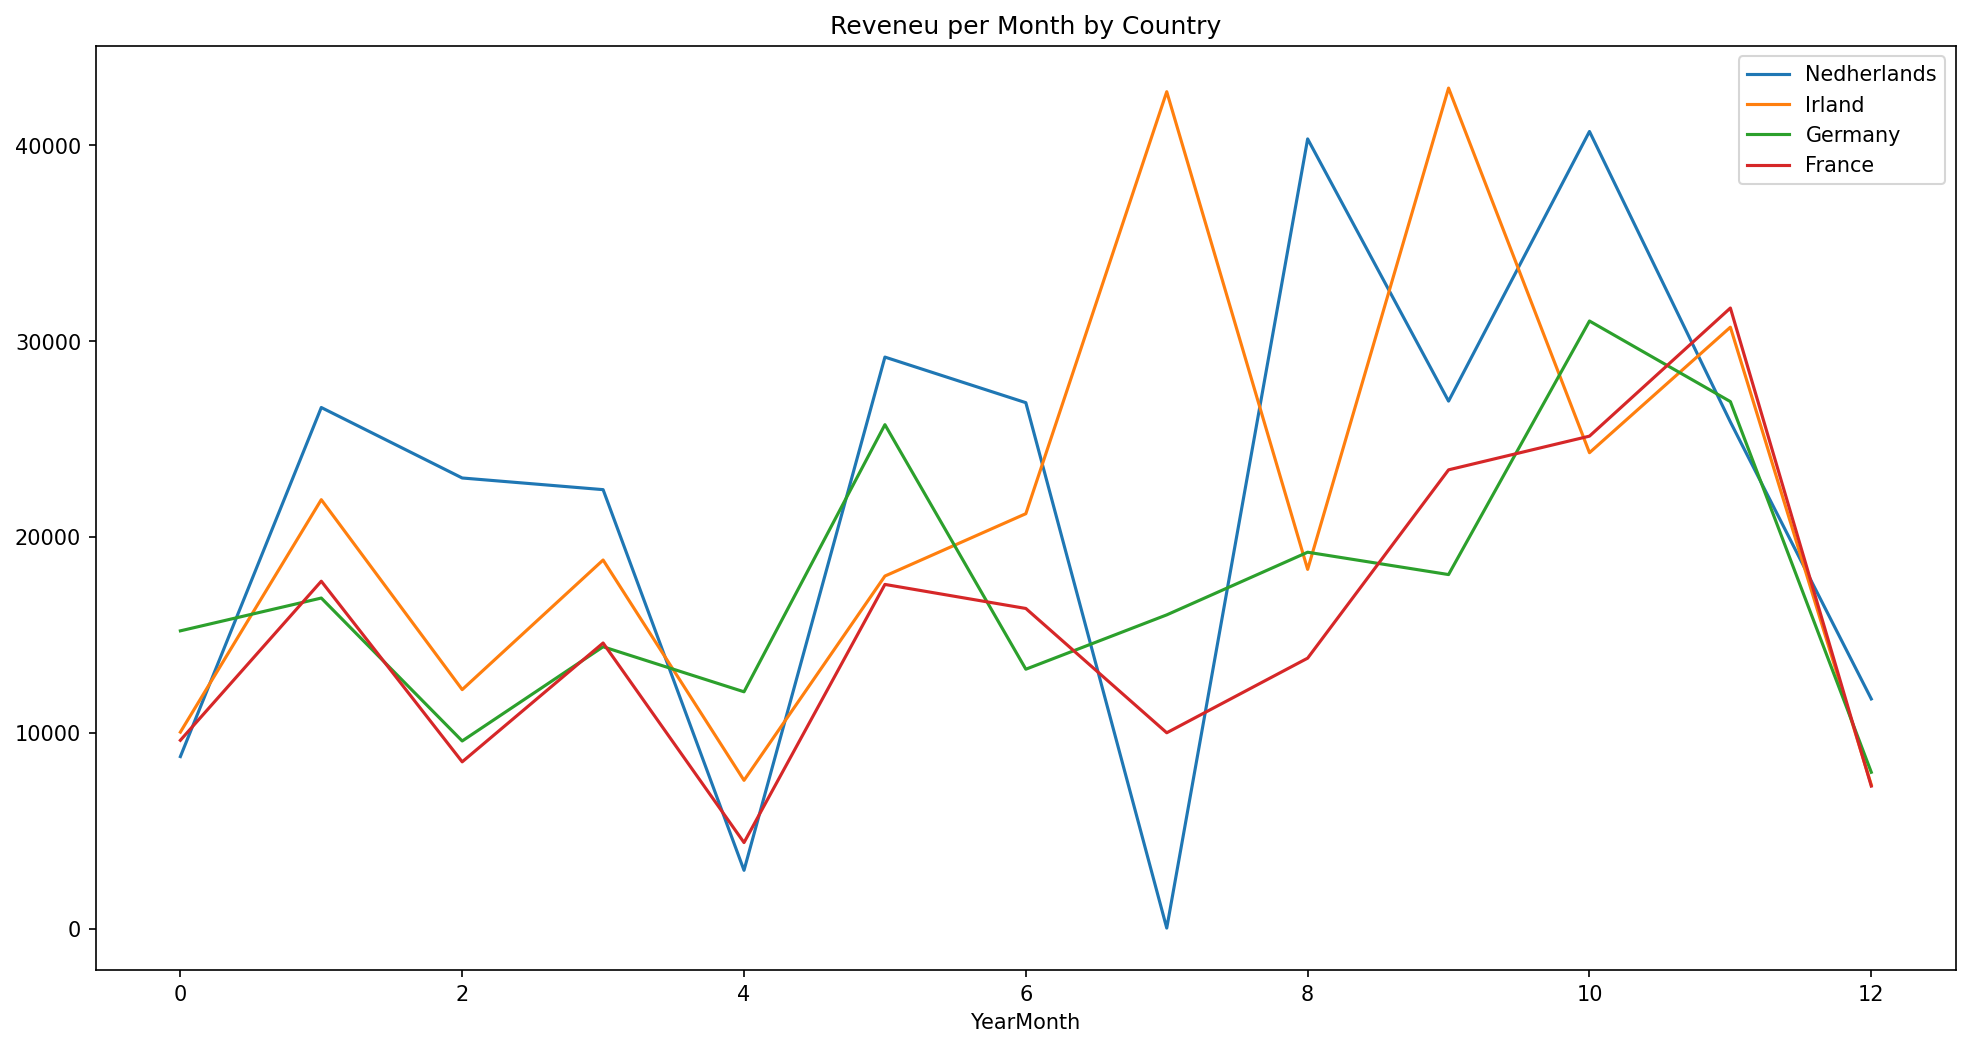

In [294]:
# Membuat table baru total revenue per bulan dari negara United Kingdom
df2 = df.loc[df['Country'].isin(['United Kingdom', 'Germany', 'France', 'EIRE', 'Nedherlands'])]
country_rev = df2.groupby(['YearMonth', 'Country']).agg(Sales = ('Sales($)','sum')).reset_index()
country_rev = country_rev.sort_values(by='YearMonth',ascending=True).reset_index(drop=True)
country_rev.rename(columns={'Sales' : 'Total Revenue ($)'}, inplace=True)


# Membuat table baru total revenue per bulan dari negara United Kingdom
df_uk = df.loc[df['Country'] == 'United Kingdom']
uk = df_uk.groupby('YearMonth')['Sales($)'].sum().reset_index()
uk = uk.sort_values(by='YearMonth',ascending=True).reset_index(drop=True)
uk.rename(columns={'Sales($)' : 'Total Revenue ($)'}, inplace=True)

# Membuat table baru total revenue per bulan dari negara Netherlands
df_ned = df.loc[df['Country'] == 'Netherlands']
ned = df_ned.groupby('YearMonth')['Sales($)'].sum().reset_index()
ned = ned.sort_values(by='YearMonth',ascending=True).reset_index(drop=True)
ned.rename(columns={'Sales($)' : 'Total Revenue ($)'}, inplace=True)

# Membuat table baru total revenue per bulan dari negara EIRE (Irlandia)
df_eir = df.loc[df['Country'] == 'EIRE']
eire = df_eir.groupby('YearMonth')['Sales($)'].sum().reset_index()
eire = eire.sort_values(by='YearMonth',ascending=True).reset_index(drop=True)
eire.rename(columns={'Sales($)' : 'Total Revenue ($)'}, inplace=True)

# Membuat table baru total revenue per bulan dari negara Germany
df_ger = df.loc[df['Country'] == 'Germany']
ger = df_ger.groupby('YearMonth')['Sales($)'].sum().reset_index()
ger = ger.sort_values(by='YearMonth',ascending=True).reset_index(drop=True)
ger.rename(columns={'Sales($)' : 'Total Revenue ($)'}, inplace=True)

# Membuat table baru total revenue per bulan dari negara France
df_fr = df.loc[df['Country'] == 'France']
fr = df_fr.groupby('YearMonth')['Sales($)'].sum().reset_index()
fr = fr.sort_values(by='YearMonth',ascending=True).reset_index(drop=True)
fr.rename(columns={'Sales($)' : 'Total Revenue ($)'}, inplace=True)



  
# Membuat grafik chart revenue kumulatif per bulan dari tiap negara
plt.figure(figsize=(16, 8), dpi=150) 

ned['Total Revenue ($)'].plot(label='Nedherlands') 
eire['Total Revenue ($)'].plot(label='Irland')
ger['Total Revenue ($)'].plot(label='Germany')
fr['Total Revenue ($)'].plot(label='France')
  
# Menambahkan title
plt.title('Reveneu per Month by Country') 
  
# Menambahkan label pada sumbu x
plt.xlabel('YearMonth') 
  
# Menambahkan legend
plt.legend() 

In [295]:
# Membuat grafik total revenue per bukan di negara UK
fig = px.line(uk,
              x = uk['YearMonth'].dt.strftime('%b %Y'),
              y = 'Total Revenue ($)',
              title = 'UK Revenue per Month')
fig.update_xaxes(tickangle = 90)
fig.update_layout(xaxis_title = 'Month-Year ($)', title_x = 0.5, width=800)
fig.show()

In [296]:
# Membuat grafik total revenue per bulan di negara Netherlands
fig = px.line(ned,
              x = ned['YearMonth'].dt.strftime('%b %Y'),
              y = 'Total Revenue ($)',
              title = 'Nedherlands Revenue per Month')
fig.update_xaxes(tickangle = 90)
fig.update_layout(xaxis_title = 'Month-Year ($)', title_x = 0.5,width=800)
fig.show()

In [297]:
# Membuat grafik total revenue per bulan di negara EIRE
fig = px.line(eire,
              x = eire['YearMonth'].dt.strftime('%b %Y'),
              y = 'Total Revenue ($)',
              title = 'EIRE (Irland) Revenue per Month')
fig.update_xaxes(tickangle = 90)
fig.update_layout(xaxis_title = 'Month-Year ($)', title_x = 0.5,width=800)
fig.show()

In [298]:
# Membuat grafik total revenue per bulan di negara German
fig = px.line(ger,
              x = ger['YearMonth'].dt.strftime('%b %Y'),
              y = 'Total Revenue ($)',
              title = 'Germany Revenue per Month')
fig.update_xaxes(tickangle = 90)
fig.update_layout(xaxis_title = 'Month-Year ($)', title_x = 0.5,width=800)
fig.show()

In [299]:
# Membuat grafik total revenue per bulan di negara France
fig = px.line(fr,
              x = fr['YearMonth'].dt.strftime('%b %Y'),
              y = 'Total Revenue ($)',
              title = 'France Revenue per Month')
fig.update_xaxes(tickangle = 90)
fig.update_layout(xaxis_title = 'Month-Year ($)', title_x = 0.5,width=800)
fig.show()

Point penting :

1. Dari grafik total revenue per bulan dari 5 negara penyumbang revenue terbesar, dapat disimpulkan bahawa hampir semua negara memiliki titik tertinggi total revenue per bulan pada musim gugur. Artinya, negara - negara tersebut memiliki pola kenaikan yang sama (kecuali EIRE/Irlandia). 'Hal tersebut mengindikasikan adanya pola seasonal karena terjadi di daerah yang sama (eropa) atau faktor lain yang dapat menggerkan pembelian secara serentak di negara - negara yag berdekatan (diskon atau semacamnya juga bisa menjadi faktor)'

2. Pola grafik pada negara United Kingdom (negara persemakmuran) sangat mirip dengan pola grafik total revenue per bulan secara global. Hal ini dikarenakan United Kingdom adalah negara penyumbang revenue terbesar


Setelah melihat revenue dari masing - masing negara, kita juga membutuhkan informasi total customer dari tiap negara beserta transaksinya.

In [300]:
# Membuat table jumlah customer di tiap negara
cust_country = df.groupby('Country')['CustomerID'].count().reset_index()
cust_country.rename(columns={'CustomerID' : 'Total Customer'}, inplace=True)
cust_country = cust_country.sort_values(by='Total Customer',ascending=False).reset_index(drop=True)

# Menambah kolom presentase customer
cust_country['Customer Percentage'] = round(((cust_country['Total Customer'])/(cust_country['Total Customer'].sum()))*100,2)
cust_country.to_csv('customerbycountry.csv',index=False)
cust_country.head(10)

,Country,Total Customer,Customer Percentage
0,United Kingdom,479004,91.44
1,Germany,9017,1.72
2,France,8387,1.60
3,EIRE,7874,1.50
4,Spain,2479,0.47
5,Netherlands,2359,0.45
6,Belgium,2031,0.39
7,Switzerland,1958,0.37
8,Portugal,1485,0.28
9,Australia,1181,0.23


Dari table di atas diapatkan informasi bahwa United Kingdom menjadi negara dengan customer terbesar (91.44 %). Hal ini sejalan dengan total revenue yang didapat. Mohon diperhatikan, grafik pertama menggambarkan total customer dari 5 negara penyumbnag revenue terbesar. Grafik kedua hanya menampilkan negara Germany, France, EIRE, dan Spain (tanpa UK). Hal ini untuk mempermudah visualisasi perbandingan jumlah customer antar negara

In [301]:
# Mmebuat grafik total customer per negara
fig = px.bar(cust_country, x='Country', y='Total Customer',
             title = 'Total Customer by Country',
             color='Country')
fig.update_layout(title_x = 0.5)
fig.show()

In [302]:
# Total customer per negara (tanpa UK)
fig = px.bar(cust_country, x=cust_country[cust_country['Country'] != 'United Kingdom']['Country'], y=cust_country.loc[cust_country['Country'] != 'United Kingdom']['Total Customer'],
             title = 'Total Customer by Country (without UK)',
             color=cust_country[cust_country['Country'] != 'United Kingdom']['Country'])
fig.update_layout(title_x = 0.5)
fig.show()

In [303]:
# Membuat pie chart presentase customer per negara
fig = px.pie(cust_country,
             values=cust_country['Customer Percentage'],
             names=cust_country['Country'],
             title = 'Percentage of Customer by Country',
             )
fig.update_layout(title_x = 0.5)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.update_layout(
    legend=dict(
        x=0.6, 
        y=0.8,
        xanchor='left',
        yanchor='middle'
    )
)
fig.show()

Dari grafik pertama terlihat bahwa total customer UK sangat jauh lebih banyak dibandingkan negara - negara lain. Grafik 2 dibuat untuk mempermudah visualisasi total customer per negara tanpa UK. Grafik terakhir menggambarkan presentasi sebaran customer dari tiap negara. Dapat dilihat bahwa UK menyumbang sekitar 91.5 % customer

### 4.3 Analisis produk

Dari analisis ini, ada beberapa hal yang harus ditemukan jawabannya :

1. Produk - produk dengan penjualan tertinggi berdasatkan volume
2. Produk - produk dengan penjualan tertinggi berdasatkan sales
3. Produk - produk dengan transaksi tertinggi

In [304]:
# Membuat table agregasi dari tiap produk
stuff2 = df.groupby(['Description']).agg(AveragePrice=('UnitPrice', 'mean'),Quantity=('Quantity', 'sum'), TotalTransaction = ('InvoiceNo', 'count')).reset_index().reset_index()
stuff2.rename(columns={'Description' : 'Product'}, inplace=True)
stuff2['Total Value'] = stuff2['AveragePrice']*stuff2['Quantity']
stuff2 = stuff2.sort_values(by='Quantity',ascending=False).reset_index(drop=True)
stuff2.to_csv('product.csv',index=0)

stuff2.head()

,index,Product,AveragePrice,Quantity,TotalTransaction,Total Value
0,2376,"Paper craft , little birdie",2.08,80995,1,"168,469.60"
1,2040,Medium ceramic top storage jar,1.47,78033,250,"114,589.90"
2,3921,World war 2 gliders asstd designs,0.32,54951,536,"17,624.30"
3,1804,Jumbo bag red retrospot,2.49,48371,2109,"120,259.85"
4,3831,White hanging heart t-light holder,3.22,37872,2311,"121,884.75"


Table di atas tidak menggambarkan seluruh produk, sehingga belum bsia diambil kesimpulan total transaction per product dan total salesnya total value. Yang dapat diambil kesimpulan adalah total quantity yang berhasil dijual. Terlihat bahwa produk kerjajinan kertas menjadi produk (Paper craft , little birdie) paling banyak terjual secara quantity. Tapi ada yang aneh dari data di atas, 'paper craft, little birdie' hanya berhasil terjual pada satu transaksi. Hal ini mengindikasikan bahwa pembelian tersebut dilakukan bukan oleh seorang individu. Artinya perusahaan ini juga melakukan bisnis B2B selain B2C sehingga kemungkinan akan ada produk - produk yang dijual dalam quantity yang cukup besar dalam sekali transaksi.

In [305]:
# Membuat grafik total volume yang terjual per product
fig = px.bar(stuff2, x=stuff2.loc[:10,'Product'], y=stuff2.loc[:10,'Quantity'],
             title = 'Total volume per product',
             color=stuff2.loc[:10,'Product'],
             color_continuous_scale = 'Magenta')
fig.update_layout(xaxis_title = 'Product', yaxis_title = 'Total Volume',title_x = 0.5)
fig.show()

In [306]:
# Membuat grafik total sales per product
stuff2 = stuff2.sort_values(by='Total Value',ascending=False).reset_index(drop=True)
fig = px.bar(stuff2, x=stuff2.loc[:10,'Product'], y=stuff2.loc[:10,'Total Value'],
             title = 'Total Sales per Product',
             color=stuff2.loc[:10,'Product'],
             color_continuous_scale = 'Magenta')
fig.update_layout(xaxis_title = 'Product', yaxis_title = 'Total Sales ($)',title_x = 0.5)
fig.show()

In [307]:
# Membuat grafik total transaksi per produk
stuff2 = stuff2.sort_values(by='TotalTransaction',ascending=False).reset_index(drop=True)
fig = px.bar(stuff2, x=stuff2.loc[:10,'Product'], y=stuff2.loc[:10,'TotalTransaction'],
             title = 'Total Transaction by Product',
             color=stuff2.loc[:10,'Product'],
             color_continuous_scale = 'Magenta')
fig.update_layout(xaxis_title = 'Product', yaxis_title = 'Total Transaction',title_x = 0.5)
fig.show()

Dari 3 grafik di atas, maka dapat diambil kesimpulan :

1. Banyaknya quantity yang terjual tidak membuat suatu produk menjadi penyumbang sales terbesar. Hal ini memiliki arti bahwa produk - produk yang dijual harganya sangat bervariasi. Harga terendah bisa sangat jauh perbedaan angkanya dengan harga yang termahal

2. Banyaknya total transaksi per produk tidak membuat produk tersebut menjadi penyumbang sales terbesar. Hal ini berkaitan dengan nomor 1

3. Dari sekian banyak produk, hanya produk 'paper craft little birdie' yang memiliki anomali karena hanya ada 1 transaksi pada produk tersebut namun volume dan sales yang dihasilkan sangat besar


In [308]:
# Membuat table total Quantity dan Total Sales per negara
product_bycountry = df.groupby(['Description','Country']).agg(AveragePrice=('UnitPrice', 'mean'),Quantity=('Quantity', 'sum'),TotalTransaction=('InvoiceNo','count')).reset_index().reset_index()
product_bycountry.rename(columns={'Description' : 'Product'}, inplace=True)
product_bycountry['Total Sales'] = product_bycountry['AveragePrice']*product_bycountry['Quantity']
product_bycountry = product_bycountry.sort_values(by='Quantity',ascending=False).reset_index(drop=True)
product_bycountry.drop(columns='index',inplace=True)


In [309]:
# Membuat table produk dengan total sales terbesar dari masing-masing 5 negara penyumbang revenue terbesar
maxaquantity = product_bycountry.groupby('Country')['Total Sales'].idxmax()
bestproduct = product_bycountry.loc[maxaquantity].sort_values(by='Total Sales',ascending=False).reset_index(drop=True)

# Menampilkan table produk dengan total sales terbesar dari masing-masing 5 negara penyumbang revenue terbesar
bestproduct.loc[bestproduct['Country'].isin(['United Kingdom', 'France', 'Germany', 'Netherlands', 'EIRE'])]

,Product,Country,AveragePrice,Quantity,TotalTransaction,Total Sales
0,"Paper craft , little birdie",United Kingdom,2.08,80995,1,"168,469.60"
1,Postage,Germany,20.54,1114,374,"22,878.70"
2,Postage,France,19.54,825,300,"16,117.75"
3,Rabbit night light,Netherlands,2.04,4801,7,"9,787.18"
4,Regency cakestand 3 tier,EIRE,12.29,679,71,"8,347.40"


Table di atas menampilkan 5 produk dengan total sales terbesar dari 5 negara penyumbang revenue terbesar

In [310]:
# Membuat table produk dengan total transaksi terbanyak dari masing-masing 5 negara penyumbang revenue terbesar
maxaquantity = product_bycountry.groupby('Country')['TotalTransaction'].idxmax()
transproduct = product_bycountry.loc[maxaquantity].sort_values(by='TotalTransaction',ascending=False).reset_index(drop=True)

# Menampilkan table produk dengan total transaksi terbanyak dari masing-masing 5 negara penyumbang revenue terbesar
transproduct.loc[transproduct['Country'].isin(['United Kingdom', 'France', 'Germany', 'Netherlands', 'EIRE'])]

,Product,Country,AveragePrice,Quantity,TotalTransaction,Total Sales
0,White hanging heart t-light holder,United Kingdom,3.23,35722,2216,"115,505.22"
1,Postage,Germany,20.54,1114,374,"22,878.70"
2,Postage,France,19.54,825,300,"16,117.75"
3,Carriage,EIRE,49.43,106,106,"5,240.00"
6,Postage,Netherlands,15.16,103,37,"1,561.70"


Table di atas menggambatkan produk dengan total transaksi terbanyak dari masing - masing negara

In [311]:
# Membuat table produk dengan total transaksi terbanyak dari masing-masing 5 negara penyumbang revenue terbesar
maxaquantity = product_bycountry.groupby('Country')['Quantity'].idxmax()
transproduct = product_bycountry.loc[maxaquantity].sort_values(by='Quantity',ascending=False).reset_index(drop=True)

# Menampilkan table produk dengan total transaksi terbanyak dari masing-masing 5 negara penyumbang revenue terbesar
transproduct.loc[transproduct['Country'].isin(['United Kingdom', 'France', 'Germany', 'Netherlands', 'EIRE'])]

,Product,Country,AveragePrice,Quantity,TotalTransaction,Total Sales
0,"Paper craft , little birdie",United Kingdom,2.08,80995,1,"168,469.60"
1,Rabbit night light,Netherlands,2.04,4801,7,"9,787.18"
2,Rabbit night light,France,1.89,4024,74,"7,597.20"
6,Pack of 72 retrospot cake cases,EIRE,0.54,1800,33,968.73
7,Round snack boxes set of4 woodland,Germany,2.94,1221,112,"3,593.23"


Table di atas menunjuka produk dengan quantity terjual terbanyak dari 5 negara

In [312]:
# Menampilkan 5 produk dengan total sales terbesar di United Kingdom
product_bycountry.loc[product_bycountry['Country'] == 'United Kingdom'].sort_values(by='Quantity',ascending=False).head()

,Product,Country,AveragePrice,Quantity,TotalTransaction,Total Sales
0,"Paper craft , little birdie",United Kingdom,2.08,80995,1,"168,469.60"
1,Medium ceramic top storage jar,United Kingdom,1.50,77036,228,"115,388.44"
2,World war 2 gliders asstd designs,United Kingdom,0.32,49430,484,"16,033.09"
3,Jumbo bag red retrospot,United Kingdom,2.52,44161,1954,"111,455.67"
4,White hanging heart t-light holder,United Kingdom,3.23,35722,2216,"115,505.22"


Table di atas menampilkan 5 produk dengan total sales terbesar di UK. Sales dari masing - masing produk sangat besar karena UK menjadi tempat lebih dari 90 % customer

### 4.4 Analisis pembeli 

Analisis ini dilakukan untuk mengetahui perilaku pembeli baik secara global maupun berdasarkan 5 negara penyumbang revenue terbesar. Hal awal dilakukan adalah mencari customer alfa. Customer alfa adalah customer dengan memiliki potensi sales per order (AOV atau average order values) di atas rata - rata populasi. Tujuannya adalah, agar karakter customer tersebut dapat dianalisa sehingga menjadi informasi yang bermanfaat bagi perusahaan

In [313]:
# Membuat variable agregat
customer = df.groupby(['CustomerID','InvoiceNo','Country','YearMonth'])['Sales($)'].sum()
customer = pd.DataFrame(customer)

# Membuat variable agregat yang menyimpan average sales, total sales per customer id, country, dan bulan
averageorder = customer.groupby(['CustomerID','Country','YearMonth']).agg(AverageSales = ('Sales($)','mean'), TotalSales = ('Sales($)','sum'))
averageorder = pd.DataFrame(averageorder).reset_index()

# Cek hasil
averageorder

,CustomerID,Country,YearMonth,AverageSales,TotalSales
0,0,Bahrain,2010-12,205.74,205.74
1,0,EIRE,2010-12,609.69,"1,219.38"
2,0,EIRE,2011-02,523.06,"2,092.22"
3,0,EIRE,2011-03,523.15,523.15
4,0,EIRE,2011-05,506.64,"2,026.57"
...,...,...,...,...,...
13079,18283,United Kingdom,2011-10,112.99,112.99
13080,18283,United Kingdom,2011-11,159.43,637.71
13081,18283,United Kingdom,2011-12,208.00,208.00
13082,18287,United Kingdom,2011-05,765.28,765.28


In [314]:
# Menghitung rata - rata sales per order
averageso = round(df['Sales($)'].sum()/df['InvoiceDate'].nunique(),2)
print(f'Rata - rata sales per order = $ {averageso}')

Rata - rata sales per order = $ 562.36


Nilai di atas adalah rata - rata sales yang dihasilkan per order dalam seluruh populasi

In [315]:
# Filtering customer dengan nilai pembelian per order di atas nilai pembelian per order rata - rata
averageorder.loc[averageorder['AverageSales'] > 562.36]['CustomerID'].nunique()

1141

Total ada 1141 customer dengan AOV di atas rata - rata

In [316]:
print(f'Persen customer alfa = {round(((averageorder.loc[averageorder["AverageSales"] > 562.36]["CustomerID"].nunique())/df["CustomerID"].nunique())*100,2)} %')

Persen customer alfa = 26.31 %


In [317]:
# Membuat variable agregat yang menyimpan average sales, total sales per customer id, country, dan bulan
averageorder2 = customer.groupby(['CustomerID','InvoiceNo']).agg(AverageSales = ('Sales($)','mean'), TotalSales = ('Sales($)','sum'))
averageorder2 = pd.DataFrame(averageorder2).reset_index()
print(f'Persen transaksi customer alfa = {round(((averageorder2.loc[averageorder2["AverageSales"] > 562.36]["InvoiceNo"].nunique())/df["InvoiceNo"].nunique())*100,2)} %')


Persen transaksi customer alfa = 20.59 %


In [318]:
customerid = averageorder.loc[averageorder['AverageSales'] > 562.36]['CustomerID']
print(f'Persentase sales yang dihasilkan customer alfa/total revenue = {round((df.loc[df["CustomerID"].isin(customerid)]["Sales($)"].sum()/df["Sales($)"].sum())*100,2)} %')

Persentase sales yang dihasilkan customer alfa/total revenue = 76.14 %


Dari hasil persen customer alfa, dapat diketahui bahwa customer alfa memiliki pola seperti pareto rules. 20 % customer akan menghasilkan 80 % hasil (walaupun hasilnya 76.14 %)

In [319]:
# Asal country customer alfa
averageorder.loc[averageorder['CustomerID'].isin(customerid)]['Country'].value_counts()

Country
United Kingdom          4165
France                   180
Germany                  177
Spain                     47
EIRE                      39
Belgium                   36
Portugal                  31
Switzerland               31
Australia                 26
Finland                   21
Norway                    19
Italy                     17
Netherlands               16
Channel Islands           15
Japan                     15
Austria                   12
Sweden                    11
Poland                    10
Cyprus                     9
Denmark                    8
Iceland                    7
Israel                     6
Unspecified                6
Hong Kong                  6
Greece                     4
Singapore                  4
Malta                      4
USA                        3
European Community         3
Canada                     2
Bahrain                    1
Brazil                     1
Lebanon                    1
RSA                        1
United

Sebaran customer alfa. Peringkat pertama ditempati oleh UK, diikuti France, Germany, Spain, dan EIRE

In [320]:
# Membuat table total sales vs bulan berdasarkan populasi customer alfa
customeralfa = averageorder.loc[averageorder['AverageSales']>562.36]
customeralfa2 = customeralfa.groupby('YearMonth')['TotalSales'].sum()
customeralfa2 = pd.DataFrame(customeralfa2).reset_index()
customeralfa2.to_csv('customeralfasales.csv',index=False)
customeralfa2

,YearMonth,TotalSales
0,2010-12,"510,048.65"
1,2011-01,"456,720.52"
2,2011-02,"306,935.81"
3,2011-03,"422,697.44"
4,2011-04,"266,337.91"
5,2011-05,"414,280.98"
6,2011-06,"449,471.42"
7,2011-07,"416,711.95"
8,2011-08,"491,087.85"
9,2011-09,"658,876.74"


In [321]:
# Grafik revenue yang diapatkan dari customer alfa per bulan
fig = px.line(customeralfa2,
              x = customeralfa2['YearMonth'].dt.strftime('%b %Y'),
              y = customeralfa2['TotalSales'],
              title = 'Revenue Generated by Customer Alpha')
fig.update_xaxes(tickangle = 90)
fig.update_layout(xaxis_title = 'Month-Year ($)', title_x = 0.5,width=800)
fig.show()

# Revenue yang didapatkan dari seluruh customer
fig = px.line(sales_month,
              x = sales_month['YearMonth'].dt.strftime('%b %Y'),
              y = 'Sales($)',
              title = 'Monthly Sales')
fig.update_xaxes(tickangle = 90)
fig.update_layout(xaxis_title = 'Month-Year ($)', title_x = 0.5,width=800)
fig.show()

Dari 2 grafik di atas, dapat disimpulkan bahwa kemungkinan besar customer alfa menjadi penyebab utama pergerakan grafik sales atau revenue per bulan. Hal ini dikarenakan kedua grafik tersebut memiliki pola yang hampir identik

#### 4.4.1 Hubungan antara hari dan jam terhadap jumlah transaksi

Analisis ini bertujuan untuk melihat karateristik customer alfa pada tiap hari dan jamnya

In [322]:
# Membuat kolom jam dan hari 
df['Time'] = df['InvoiceDate'].dt.strftime('%H:00')
df['Day'] = df['InvoiceDate'].dt.day_name()
df2 = df.loc[df['CustomerID'].isin(customerid)]
df3 = df.loc[~df['CustomerID'].isin(customerid)]


C:\Users\Fiqih\AppData\Local\Temp\ipykernel_35888\1308802620.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Fiqih\AppData\Local\Temp\ipykernel_35888\1308802620.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [323]:
# Membuat table jam pembelian dan total transaksi customer alfa
buytimea = df2.groupby('Time')['InvoiceNo'].nunique()
buytimea = pd.DataFrame(buytimea).reset_index()
buytimea.rename(columns={'InvoiceNo' : 'Transaction by User'},inplace=True)

# Membuat table jam pembelian dan total transaksi customer non alfa
buytimena = df3.groupby('Time')['InvoiceNo'].nunique()
buytimena = pd.DataFrame(buytimena).reset_index()
buytimena.rename(columns={'InvoiceNo' : 'Transaction by User'},inplace=True)
# buytimea.to_csv('buytimena.csv',index=False)
# Cek hasil
len(df3)/len(df2)

0.600911305134419

Di bawah ini, kit akan melihat grafik perilaku pembelian antara customer alfa dengan customer biasa pada tiap jamnya

In [324]:
# Membuat grafik transaksi per jam customer alfa 
fig = px.line(buytimea,
              x = buytimea['Time'],
              y = buytimea['Transaction by User'],
              title = 'Total User Transaction by Alpha Customer per Hour')
fig.update_xaxes(tickangle = 90)
fig.update_layout(xaxis_title = 'Time Hour',yaxis_title = 'User Transaction', title_x = 0.5,width = 800)
fig.show()

# Membuat grafik transaksi per jam non alfa customer
fig = px.line(buytimena,
              x = buytimena['Time'],
              y = buytimena['Transaction by User'],
              title = 'Total User Transaction by non Alpha Customer per Hour')
fig.update_xaxes(tickangle = 90)
fig.update_layout(xaxis_title = 'Time Hour',yaxis_title = 'User Transaction', title_x = 0.5,width = 800)
fig.show()

Dari grafik di atas dapat diambil kesimpulan :

1. pola perilaku antara customer alfa dengan customer non alfa memiliki kemiripan 

2. Ini artinya, ada kemungkinan seluruh populasi customer juga memiliki pola yang sama dan tidak terbatas pada suatu negara

3. Dari grafik di atas juga dapat disimpulkan bahwa terjadi kenaikan pembelian dari pagi hingga jam 12.00 siang (puncaknya), setelah itu pembelian turun hingga jam 20.00

4. Mayoritas pembelian kemungkinan dilakukan bukan oleh individu atau pegawai, karena jam 07.00 sampai jam 12.00 adalah waktu bekerja. Sementara saat waktu istirahat dan pulang kerja (pada umumnya) pembelian justru mengalami penurunan

Di bawah ini adalah perbandingan perilaku pembelian berdasarkan hari antara customer alfa dan non alfa.

In [325]:
# Membuat table hari pembelian customer alfa 
buydaya = df2.groupby('Day')['InvoiceNo'].nunique()
buydaya = pd.DataFrame(buydaya).reset_index()
buydaya.rename(columns={'InvoiceNo': 'Transaction by User'}, inplace=True)
all_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
buydaya = buydaya.set_index('Day').reindex(all_days, fill_value=0).reset_index()

# Membuat table hari pembelian customer non alfa
buydayna = df3.groupby('Day')['InvoiceNo'].nunique()
buydayna = pd.DataFrame(buydayna).reset_index()
buydayna.rename(columns={'InvoiceNo': 'Transaction by User'}, inplace=True)
all_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
buydaya = buydaya.set_index('Day').reindex(all_days, fill_value=0).reset_index()
buydayna = buydayna.set_index('Day').reindex(all_days, fill_value=0).reset_index()

# Cek hasil
# buydayna.to_csv('alphacust_day.csv',index=False)
# buydayna.loc
buyday = df.groupby('Day')['InvoiceNo'].nunique()
buyday

Day
Friday       3125
Monday       3094
Sunday       2203
Thursday     4229
Tuesday      3535
Wednesday    3682
Name: InvoiceNo, dtype: int64

In [326]:
# Membuat grafik transaksi per hari customer alfa
fig = px.line(buydaya,
              x = buydaya['Day'],
              y = buydaya['Transaction by User'],
              title = 'Total Transaction by Alpha Customer per Day')
fig.update_xaxes(tickangle = 90)
fig.update_layout(xaxis_title = 'Day',yaxis_title = 'User Transaction', title_x = 0.5,width = 800)
fig.show()

# Membuat grafik transaksi per hari customer non alfa
fig = px.line(buydayna,
              x = buydayna['Day'],
              y = buydayna['Transaction by User'],
              title = 'Total Transaction by non Alpha Customer per Day')
fig.update_xaxes(tickangle = 90)
fig.update_layout(xaxis_title = 'Day',yaxis_title = 'User Transaction', title_x = 0.5,width = 800)
fig.show()

Dari grafik di atas dapat disimpulkan :

1. Baik customer alfa maupun non alfa, kedua segment tersebut memiliki pola perilaku pembelian yang sama berdasarkan hari

2. Kedua segment tersebut mengalami peningkatan aktivitas pembelian dari hari senin hingga kamis, lalu turun sampai menyentuh titik 0 di hari sabtu (karena tidak ada data pembelian di hari sabtu) dan naik lagi pada hari mingg

3. Kedua segment mengalami puncak aktivitas pembelian yang sama yaitu ada hari kamis

4. Kemungkinan dari seluruh populasi customer (terlepas dari mana aslanya) memiliki pola pembelian yang sama berdasarkan hari

#### 4.4.2. Analisis karakter customer dari berbagai negara berdasarkan hari pembelian

Di bawah ini adalah analisis karakter customer dari berbagai negara berdasarkan waktu pembeliannya. Hal ini dilakukan untuk mengetahui, apakah pola pembelian pada analisis sebelumnya juga mewakili populasi dari masing - masing negara. Hasil analisis ini sangat bermanfaat untuk memberikan insight kapan suatu promo atau iklan dapat dimaksimalkan. Analisis ini menggunakan korelasi kendall karena sifat datanya yang sangat skewed dan terdapat variable kategorik

In [327]:
groupofcountries = df2.groupby(['Country','Day'])['Sales($)'].sum()
groupofcountries = pd.DataFrame(groupofcountries)
groupofcountries.reset_index(inplace=True)
all_days = {'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6,'Sunday': 7}
groupofcountries['Day'] = groupofcountries['Day'].map(all_days)
groupofcountries.to_csv('groupofcountries.csv',index=False)
groupofcountries.head()


,Country,Day,Sales($)
0,Australia,5,"3,059.44"
1,Australia,1,"1,109.04"
2,Australia,7,"1,743.93"
3,Australia,4,"53,038.99"
4,Australia,2,"32,063.59"


In [328]:
# Cek skewness
print(f' Skewness = {groupofcountries["Sales($)"].skew()}')

 Skewness = 5.243405578989767


Dari nilai skewness dapat disimpulkan jika data sales dari seluruh negara memiliki distribusi right/positive skewed. Oleh karena itu, kita akan memakai korelasi kendall karena terdapat nilai atribut ordinal (hari) dan distribusi data salesnya yang bersifat skewed

##### 4.4.2.1 Korelasi antara hari dan sales pada negara United Kingdom

Skewness UK : -1.725005416848165


<Axes: ylabel='Frequency'>

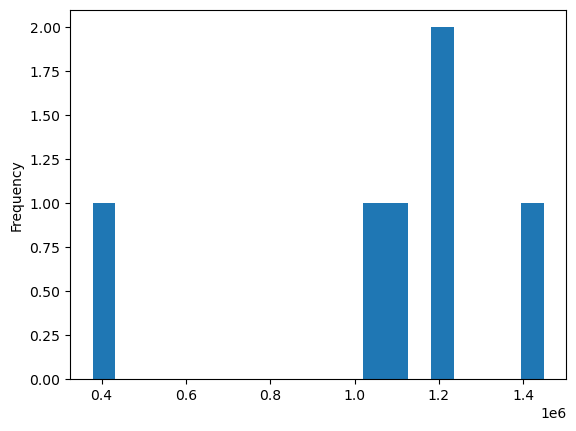

In [329]:
uk = groupofcountries.loc[(groupofcountries['Country'] == 'United Kingdom')].sort_values(by='Day')
print(f'Skewness UK : {uk["Sales($)"].skew()}')
uk['Sales($)'].plot(kind='hist',bins=20)

tau-correlation: -0.33, p-value: 0.46944444444444444


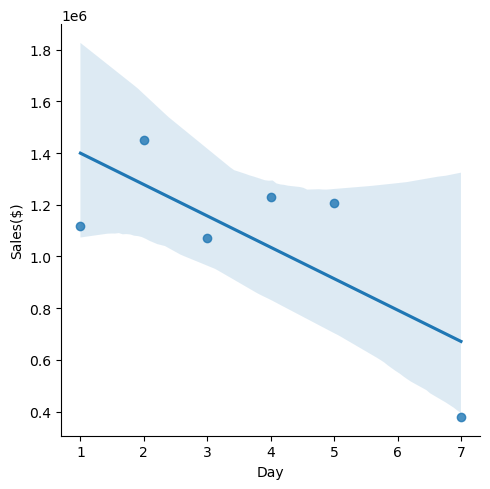

In [330]:
sns.lmplot(data=uk,x='Day', y='Sales($)')
corr_tau, pval_k = stats.kendalltau(uk['Sales($)'], uk['Day'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

Karena nilai tau mendekati - 0.5 dan p-value kurang dari 0.05, maka dapat diambil kesimpulan bahwa di negara UK hubungan antara hari dengan sales yang didapatkan berkorelasi moderat negatif. Negatif artinya jumlah sales yang dihasilkan akan berkurang seiring hari berjalan (korelasi negatif)

##### 4.4.2.2 Korelasi antara hari dan sales pada negara Netherlands

In [331]:
neth = groupofcountries.loc[(groupofcountries['Country'] == 'Netherlands')].sort_values(by='Day')
print(f'Skewness Netherlands : {neth["Sales($)"].skew()}')

Skewness Netherlands : 0.46876595193912796


tau-correlation: -0.33, p-value: 0.46944444444444444


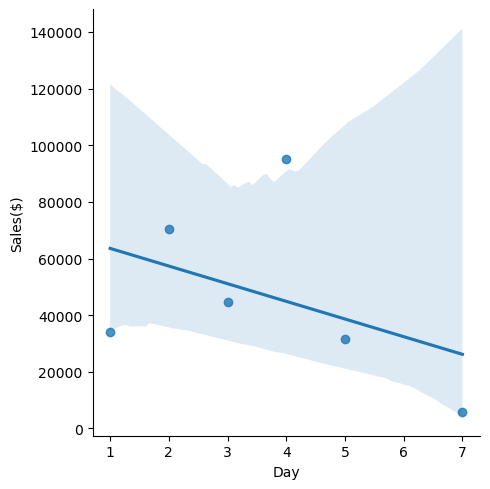

In [332]:
sns.lmplot(data=neth,x='Day', y='Sales($)')
corr_tau, pval_k = stats.kendalltau(neth['Sales($)'], neth['Day'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

Karena nilai tau mendekati - 0.5 dan p-value kurang dari 0.05, maka dapat diambil kesimpulan bahwa di negara Netherkands hubungan antara hari dengan sales yang didapatkan berkorelasi moderat negatif. Negatif artinya jumlah sales yang dihasilkan akan berkurang seiring hari berjalan (korelasi negatif)

##### 4.4.2.3 Korelasi antara hari dan sales pada negara Germany

In [333]:
ger = groupofcountries.loc[(groupofcountries['Country'] == 'Germany')].sort_values(by='Day')
print(f'Skewness Germany : {ger["Sales($)"].skew()}')

Skewness Germany : 0.3833170150239772


tau-correlation: -0.07, p-value: 1.0


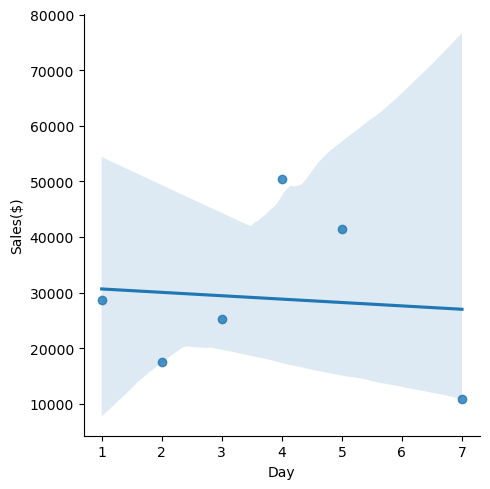

In [334]:
sns.lmplot(data=ger,x='Day', y='Sales($)')
corr_tau, pval_k = stats.kendalltau(ger['Sales($)'], ger['Day'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

Karena nilai tau mendekati 0 dan p-value bernilai 1, maka dapat diambil kesimpulan bahwa di negara Germany tidak ada korelasi antara jumlah sales per hari dengan hari itu sendiri. Aritnya, ada kemungkinan jerman memiliki karakter pembeli yang unik dibandingkan mayoritas populasi

##### 4.4.2.4 Korelasi antara hari dan sales pada negara EIRE

In [335]:
ei = groupofcountries.loc[(groupofcountries['Country'] == 'EIRE')].sort_values(by='Day')
print(f'Skewness EIRE(Irlandia) : {ei["Sales($)"].skew()}')

Skewness EIRE(Irlandia) : -1.3592188544408592


tau-correlation: 0.07, p-value: 1.0


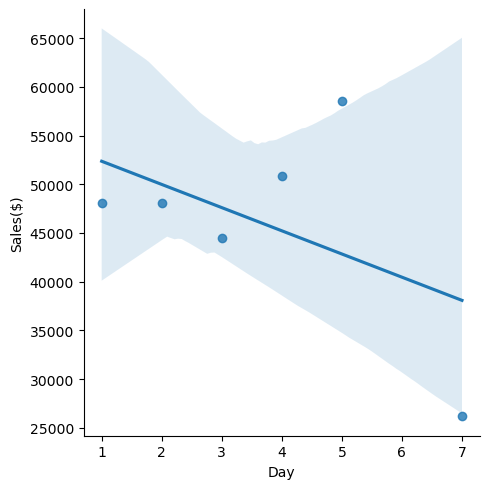

In [336]:
sns.lmplot(data=ei,x='Day', y='Sales($)')
corr_tau, pval_k = stats.kendalltau(ei['Sales($)'], ei['Day'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

Karena nilai tau mendekati 0 dan p-value bernilai 1, maka dapat diambil kesimpulan bahwa di negara EIRE tidak ada korelasi antara jumlah sales per hari dengan hari itu sendiri. ArtInya, ada kemungkinan EIRE memiliki karakter pembeli yang berbeda dibandingkan mayoritas populasi

##### 4.4.2.5 Korelasi antara jam dan sales pada negara France

In [337]:
fr = groupofcountries.loc[(groupofcountries['Country'] == 'France')].sort_values(by='Day')
print(f'Skewness France : {fr["Sales($)"].skew()}')

Skewness France : -0.8996617633588033


tau-correlation: 0.07, p-value: 1.0


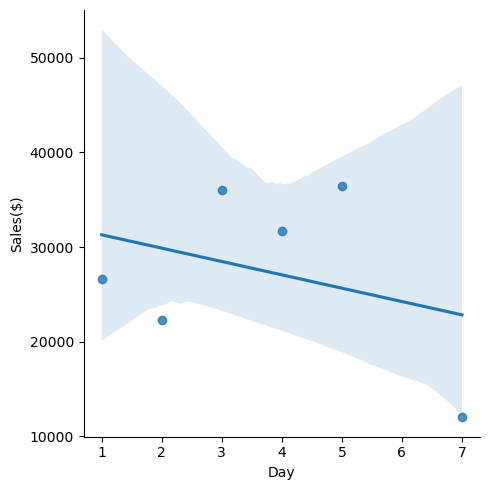

In [338]:
sns.lmplot(data=fr,x='Day', y='Sales($)')
corr_tau, pval_k = stats.kendalltau(fr['Sales($)'], fr['Day'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

Karena nilai tau mendekati 0 dan p-value bernilai 1, maka dapat diambil kesimpulan bahwa di negara France tidak ada korelasi antara jumlah sales per hari dengan hari itu sendiri. Artinya, ada kemungkinan France memiliki karakter pembeli yang berbeda dibandingkan mayoritas populasi

Kesimpulan :

1. Negara yang memiliki korelasi negatif moderat antara jumlah sales dan hari adalah UK dan Netherlands

2. Germany, France, dan EIRE total total sales per harinya tidak memiliki korelasi dengan hari itu sendiri/berjalannya hari itu sendiri

3. Ada kemungkinan terdapat perbedaan karakter pembeli berdasarkan waktu antara UK dan Netherlands dengan Germany, France, dan EIRE

#### 4.4.3 Grafik hubungan antara hari dan jam dengan transaksi

In [339]:
# Membuat table jam pembelian
buytime2 = df2.groupby(['Country','Time'])['InvoiceNo'].nunique()
buytime2 = pd.DataFrame(buytime2).reset_index()
buytime2.rename(columns={'InvoiceNo' : 'Transaction by User'},inplace=True)
# Cek hasil
buytime2.head()

,Country,Time,Transaction by User
0,Australia,08:00,1
1,Australia,09:00,5
2,Australia,10:00,6
3,Australia,11:00,5
4,Australia,12:00,8


In [340]:
# Membuat table jam pembelian
buyday2 = df2.groupby(['Country','Day'])['InvoiceNo'].nunique()
buyday2 = pd.DataFrame(buyday2).reset_index()
buyday2.rename(columns={'InvoiceNo': 'Transaction by User'}, inplace=True)
buyday2.sort_values(by='Day',ascending=False,inplace=True)

days2 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
countries = df2['Country'].unique()

# Membuat dataframe yang berisi Country dan Day
combinations = pd.MultiIndex.from_product([countries, days2], names=['Country', 'Day']).to_frame(index=False)

# Gabungkan dengan buyday2
buyday2 = combinations.merge(buyday2, on=['Country', 'Day'], how='left').fillna(0)

# Menampilkan hasil
print(buyday2.head(10))

          Country        Day  Transaction by User
0  United Kingdom     Monday             1,313.00
1  United Kingdom    Tuesday             1,597.00
2  United Kingdom  Wednesday             1,471.00
3  United Kingdom   Thursday             1,583.00
4  United Kingdom     Friday             1,345.00
5  United Kingdom   Saturday                 0.00
6  United Kingdom     Sunday               676.00
7          France     Monday                44.00
8          France    Tuesday                39.00
9          France  Wednesday                53.00


In [341]:
# Mmebuat grafik hubungan antara jumlah transaksi vs hari
countries = ['Netherlands', 'France', 'EIRE', 'Germany']
fig = make_subplots(rows=1, cols=5, shared_yaxes=True, subplot_titles=countries)

for i, country in enumerate(countries, start=1):
    countrydf = buytime2[buytime2['Country'] == country]
    fig.add_trace(go.Scatter(x=countrydf['Time'], y=countrydf['Transaction by User'], mode='lines', name=country),row=1, col=i)
fig.update_layout(height=400,  width=1500,  title_text='Total Transactions per Hour ',showlegend=False)
fig.update_xaxes(title_text='Hour', tickangle=90)
fig.update_yaxes(title_text='Total Transactions', row=1, col=1)

# Cek hasil
fig.show()

In [368]:
fig = px.line(buytime2,
              x = buytime2.loc[buytime2['Country'] == 'United Kingdom']['Time'],
              y = buytime2.loc[buytime2['Country'] == 'United Kingdom']['Transaction by User'],
              title = 'Total Transaction per Hour in UK')
fig.update_xaxes(tickangle = 90)
fig.update_layout(xaxis_title = 'Time Hour',yaxis_title = 'User Transaction', title_x = 0.5,width = 800)
fig.show()

Dari grafik - grafik hubungan anatara jumlah transaksi dengan jam per negara adalah :

1. Pola grafik negara UK mirip seperti pola grafik transaksi vs waktu alfa customer. Hal ini mengindikasikan bahwa sebagian besar alfa customer berada di UK

2. Pola transaksi vs jam dari masing - masing negara kurang mirip, ini mengindikasikan adanya perbedaan karakter antar customer di tiap negara

3. Pola yang paling mirip mengenai perilaku pembelian customer antar negara adalah jam saat puncak transaksi dan jam penurunan transaksi. Dari setiap grafik dapat terlihat jika puncak transaksi berada pada jam 10, 11, atau 12 siang, dan menurun setelah jam 12, 13, atau 14 siang

4. Dari poin 3, dapat diambil insight jika kemungkinan besar yang melakukan transaksi bukanlah orang yang berprofesi sebagai pegawai

In [343]:
# Membuat grafik transaksi vs hari per negara
countries = ['Netherlands', 'France', 'EIRE', 'Germany']
fig = make_subplots(rows=1, cols=5, shared_yaxes=True, subplot_titles=countries)

for i, country in enumerate(countries, start=1):
    country_df = buyday2[buyday2['Country'] == country]
    fig.add_trace(go.Scatter(x=country_df['Day'], y=country_df['Transaction by User'], mode='lines', name=country), row=1, col=i)

fig.update_layout(height=400,  width=1500, title_text='Total Transactions per Day',showlegend=False)
fig.update_xaxes(title_text='Day', tickangle=90)
fig.update_yaxes(title_text='Total Transactions', row=1, col=1)
fig.show()

In [344]:
fig = px.line(buyday2,
              x = buyday2.loc[buyday2['Country'] == 'United Kingdom']['Day'],
              y = buyday2.loc[buyday2['Country'] == 'United Kingdom']['Transaction by User'],
              title = 'Total Transaction per Day in UK')
fig.update_xaxes(tickangle = 90)
fig.update_layout(xaxis_title = 'Day',yaxis_title = 'User Transaction', title_x = 0.5,width = 800)
fig.show()

Dari grafik di atas maka dapat diambil kesimpulan :

1. Masing - masing negara memiliki pola yang hampir mirip, yaitu transaksi berada pada puncaknya pada hari kamis atau rabu, lalu menurun di hari jumat sampai sabtu. Setelah itu transaksi naik kembali pada hari minggu


### 4.5 Mencari faktor utama pertumbuhan revenue

Analisis sebelumnya adalah untuk mengetahui karakter konsumen pada tiap negara pada berdasarkan hari dan jamnya. Analisis tersebut sangat diperlukan bagi tim pemasaran untuk memaksimalkan efektifitas promosi dan iklan.

Pada analisis kali ini, kita akan melakukan uji hipotesis untuk membuktikan apakah customer dengan quantity barang yang dibeli/order di atas rata - rata merupakan penyumbang terbesar revenue perusahaan. Analisis ini dilakukan sebagai hasil dari analisis produk, dimana produk dengan jumlah transaksi atau volume terjual yang tinggi belum tentu menjadi penyumbang utama revenue perusahaan. Output dari hasil analisis ini adalah berupa insight. Jika memang pembeli dengan jumlah quantitiy barang/order di atas rata - rata terbukti menjadi penyumbang terbesar, maka perusahaan, dapat membuat strategi khusus secara global untuk meningkatkan keprcayaan segment pembeli ini, katakanlah misalkan dengan memberikan discount dengan minimal quantitiy barang yang dibeli sebesar rata - rata quantity barang terjual/order.

Pada analisis ini kita menggunakan uji hipotesis t one sample one sided. Hipotesisnya adalah :
customer a : Jumlah barang yang dibeli/order nilainya di atas rata - rata jumlah barang yang dibeli/order dari populasi
customer b : Jumlah barang yang dibeli/order nilainya sama atau lebih kecil dari rata - rata jumlah barang yang dibeli/order dari populasi

Ho : customer a nilai salesnya kurang dari atau sama dengan customer b
H1 : customer a nilai salesnya lebih dari dengan customer b




In [345]:
# Menghitung rata - rata quantity terjual
avgquant = df['Quantity'].sum()/df['InvoiceNo'].nunique()

print(f'Rata - rata quantity yang terjual per transaksi = {avgquant} pcs')

Rata - rata quantity yang terjual per transaksi = 280.08501107308234 pcs


In [346]:
# Memfilter pembeli dengan jumlah qbarang yang dibeli di atas 280.1 pcs/order
above = df.loc[df['Quantity'] > 280.1]
customera = above.groupby('InvoiceNo').agg(customerid = ('CustomerID' , 'count'), quantity = ('Quantity' , 'sum'), sales = ('Sales($)' , 'sum'))
customera.reset_index(inplace=True)
customera

,InvoiceNo,customerid,quantity,sales
0,536387,2,864,"1,166.40"
1,536390,1,288,28.80
2,536437,1,600,144.00
3,536477,1,480,"1,627.20"
4,536584,1,384,"1,132.80"
...,...,...,...,...
622,581419,1,288,60.48
623,581457,3,1346,"4,743.50"
624,581458,1,1500,"1,080.00"
625,581459,1,1200,864.00


In [347]:
# Memfilter pembeli dengan jumlah barang yang dibeli di bawah atau sama dengan 280.1 pcs/order
below = df.loc[df['Quantity'] <= 280.1]
customerb = below.groupby('InvoiceNo').agg(customerid = ('CustomerID' , 'count'), quantity = ('Quantity' , 'sum'), sales = ('Sales($)' , 'sum'))
customerb.reset_index(inplace=True)
customerb

,InvoiceNo,customerid,quantity,sales
0,536365,7,40,139.12
1,536366,2,12,22.20
2,536367,12,83,278.73
3,536368,4,15,70.05
4,536369,1,3,17.85
...,...,...,...,...
19673,581584,2,120,140.64
19674,581585,21,278,329.05
19675,581586,4,66,339.20
19676,581587,15,105,249.45


In [348]:
# Total customer dengan pembelian di atas rata - rata
print(f'Total jumlah customer dengan quantity pembelian di atas rata - rata per transaksi = {round((above["CustomerID"].nunique()/df["CustomerID"].nunique())*100,2)} %')

Total jumlah customer dengan quantity pembelian di atas rata - rata per transaksi = 4.8 %


In [349]:
# Rata - rata sales pada quantity di atas 280
above280 = customera['sales'].mean()

# Rata - rata sales pada quantity dibawah atau sama dengan 280
below280 = customerb['sales'].mean()

In [376]:
print(f'Rata - rata sales untuk pembelian di atas 280 pcs = $ {above280}')
print(f'Rata - rata sales untuk pembelian di bawah 280 pcs = $ {below280}')
print(f'% sales untuk customer dengan pembelian di atas 280 pcs = {((df.loc[df["Quantity"]>280.1]["Sales($)"].sum())/(df["Sales($)"].sum()))*100}%')

Rata - rata sales untuk pembelian di atas 280 pcs = $ 1716.4892185007977
Rata - rata sales untuk pembelian di bawah 280 pcs = $ 471.68769559914625
% sales untuk customer dengan pembelian di atas 280 pcs = 10.39030114246486%


In [351]:
t, p = stats.ttest_ind(customera['sales'],customerb['sales'])
print('T-Statistic:',t)
print('P-value:',p) #
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: the mean of sales of customer a is greater than the mean of sales of customer b")
else:
    print("Fail to reject the null hypothesis: the mean of sales of customer a is not greater or equal to the mean of sales of customerb")

T-Statistic: 18.48517631360584
P-value: 1.1359468762378822e-75
Reject the null hypothesis: the mean of sales of customer a is greater than the mean of sales of customer b


### 5. Kesimpulan

1. Dalam kurun waktu 1 tahun (+1 bulan), revenue terbesar didapatkan pada bulan November 2011. Total revenue yang didapatkan pada bulan tersebut adalah $ 1,463,648.96


2. United Kingdom menjadi negara dengan sumber revenue terbesar dimana total revenue yang dihasilkan dari negara tersebut adalah sebesar $ 8,760,562.62	atau 84.58 % dari total revenue perusahaan ini


3. Customer alfa adalah salah tipe customer yang menjadi penyumbang terbesar revenue. Ciri - ciri customer alfa :

    - Tingkat transaksi meningkat dari hari senin hingga pada puncaknya di hari kamis, lalu menurun dari hari jumat hingga sabtu dan naik lagi pada hari minggu
    - Aktif bertransaksi pada dari jam 07.00 hingga pada puncaknya yaitu jam 12.00. Pola ini mengindikasikan bahwa customer alfa (dan juga mayoritas customer) bukanlah seorang pegawai karena jam - jam tersebut merupakan jam bekerja
    - Kebanyakan customer alfa berasal dari United Kingdom

    selain ciri - ciri di atas ada juga customer penyumbang revenue terbesar yaitu customer dengan rata - rata quantity barang yang dibeli/order lebih dari 280 pcs


4. Total revenue dari tiap negara berbeda - beda karena faktor jumlah customer yang berasal dari negara itu sendiri. Sebagai contoh, United Kingdom menjadi negara dengan jumlah customer terbesar yaitu sebesar 91.5 % atau sebanyak 479.004 ribu customer. Sementara itu, negara lain hanya memiliki customer antara 57 - 9.017 customer. Selain itu preferensi pembelian produk dari tiap customer di masing - masing negara juga dapat membuat perbedaan pada hasil revenue tiap negara


5. Secara umum terdapat pembeda antar customer di tiap negara. Pembeda itu antara lain :
    - Di UK dan Netherlands, hari memiliki korelasi dengan jumlah transaksi sehingga mudah untuk membuat prediksi pasar. Di France, Germany, dan EIRE(irland), berdasarkan analisis korelasi, hampir tidak ada hubungan antara jumlah transaksi dengan hari


6. Insight pada perusahaan :
    - Manfaatkan jam - jam dan hari - hari tertentu untuk melakukan promosi. Lakukan promosi pada jam 07.00 - 12.00 dimana mayoritas customer sedang aktif pada jam - jam itu. Maksimalkan juga promosi pada hari Senin - Kamis karena pada hari itulah mayoritas customer sangat aktif
    - Berikan diskon pada jumlah pembelian tertentu, misalnya 280 pcs/order. Hal ini dikarenakan penyumbang revenue terbesar berasal dari customer dengan rata - rata quantity barang yang dibeli/order lebih dari 280 pcs. Dengan memberikan diskon maka kita bisa menarik minat mereka untuk membeli dalam jumlah yang lebih besar
    - Rata - rata pendapatan revenue pada tahun 2011 adalaah sebesar 2.79% /bulan atau 33.53 % per tahun. Ini artinya dengan menjaga kondisi performanya tetap seperti ini, perusahaan masih dapat memiliki peluang yang besar untuk meningkatkan revenuenya di atas 10 %. Yang paling penting adalah bagaimana memasarkan produk pada waktu yang tepat dan orang yang tepat (lihat jawaban sebelumnya)
    -Gunakan matriks waktu dalam menyusun strategi marketing. Gunakan matriks Average of Values atau rata - rata quantity produk/order dalam pemberian promosi


